In [ ]:
#Import necessary libraries for our model
import pandas as pd

# Small Dataset: COIL Challenge 2000: Insurance Company

In [ ]:
#The provided dataset is split into 2 main files: first file contains a dictionary where the columns are placed, as well as mappings between values and meaning, and
#the second file is the dataset itself

from google.colab import files

uploaded_files = files.upload()

#Extract file names
dictionary_file = list(uploaded_files.keys())[0]
training_data_file = list(uploaded_files.keys())[1]
evaluation_data_file = list(uploaded_files.keys())[2]
evaluation_targets_file = list(uploaded_files.keys())[3]


Saving dictionary.txt to dictionary (4).txt
Saving ticdata2000.txt to ticdata2000 (4).txt
Saving ticeval2000.txt to ticeval2000 (4).txt
Saving tictgts2000.txt to tictgts2000 (4).txt


In [ ]:
#2: Parse the dictionary to extract column names
with open(dictionary_file, 'r', encoding='latin-1') as file:
  lines = file.readlines()

#Extract column names (First lines that start with a number, until we meet L0)
column_names = []
for line in lines:
    if line.strip() and line[0].isdigit():  # Lines starting with a number
        parts = line.split(maxsplit=2)  # Split into Nr, Name, and Description
        column_names.append(parts[1])  # Extract the "Name" part
    elif line.strip().startswith("L0:"):  # Stop processing when mappings start
        break

print("\nExtracted column names:")
print(column_names)

#3. Load the training, evaluation and targets datasets
insurance_train_val = pd.read_csv(training_data_file, delimiter='\t') #Read the text file using pandas read, data is separated with tabs
insurance_evaluation = pd.read_csv(evaluation_data_file, delimiter='\t')
insurance_targets = pd.read_csv(evaluation_targets_file, header=None).squeeze()

#4. Assign column names
if len(column_names) == insurance_train_val.shape[1]:
    insurance_train_val.columns = column_names
else:
    raise ValueError("Number of column names does not match the number of columns in the dataset.")

if len(column_names) - 1 == insurance_evaluation.shape[1]:
    insurance_evaluation.columns = column_names[:-1]
else:
    raise ValueError("Number of column names does not match the number of columns in the dataset.")

print("\nColumns for training:")
print(insurance_train_val.columns) #We verify to see if the attributed column names were placed correctly for our dataset

print("\nColumns for evaluation:")
print(insurance_evaluation.columns)

print("Dataset Preview:")
print(insurance_train_val.head())

#After we assured that the columns were placed correctly on our dataset, we take a further look on the existing mappings in the dictionary

#5. Extract mappings from dictionary
mappings = {
    'L0': {},
    'L1': {},
    'L2': {},
    'L3': {},
    'L4': {}
}

current_mapping = None
# Replace problematic characters like \x96 with en dash (–)
lines = [line.replace('\x96', '–') for line in lines]

for line in lines:
    line = line.strip()
    if line.startswith("L0:"):
        current_mapping = 'L0'
    elif line.startswith("L1:"):
        current_mapping = 'L1'
    elif line.startswith("L2:"):
        current_mapping = 'L2'
    elif line.startswith("L3:"):
        current_mapping = 'L3'
    elif line.startswith("L4:"):
        current_mapping = 'L4'
    elif current_mapping and line and not line[0].isdigit():
        # Skip non-mapping lines like headers
        continue
    elif current_mapping and line and line[0].isdigit():
        # Parse mappings
        parts = line.split(maxsplit=1)
        if len(parts) == 2:
            try:
                key, value = parts
                mappings[current_mapping][int(key)] = value
            except ValueError:
                print(f"Skipping invalid mapping line: {line}")

# Display parsed mappings
for key, value in mappings.items():
    print(f"Mapping for {key}: {value}")

#Apply the determined mappings
# insurance_train_val['MOSTYPE_mapped'] = insurance_train_val['MOSTYPE'].map(mappings['L0'])
# insurance_evaluation['MOSTYPE_mapped'] = insurance_evaluation['MOSTYPE'].map(mappings['L0'])
# insurance_train_val['MGEMLEEF_mapped'] = insurance_train_val['MGEMLEEF'].map(mappings['L1'])
# insurance_evaluation['MGEMLEEF_mapped'] = insurance_evaluation['MGEMLEEF'].map(mappings['L1'])
# insurance_train_val['MOSHOOFD_mapped'] = insurance_train_val['MOSHOOFD'].map(mappings['L2'])
# insurance_evaluation['MOSHOOFD_mapped'] = insurance_evaluation['MOSHOOFD'].map(mappings['L2'])
# insurance_train_val['MGODRK_mapped'] = insurance_train_val['MGODRK'].map(mappings['L3'])
# insurance_evaluation['MGODRK_mapped'] = insurance_evaluation['MGODRK'].map(mappings['L3'])
# insurance_train_val['PWAPART_mapped'] = insurance_train_val['PWAPART'].map(mappings['L4'])
# insurance_evaluation['PWAPART_mapped'] = insurance_evaluation['PWAPART'].map(mappings['L4'])

#6. Verify the mapping
# print(insurance_train_val[['MOSTYPE', 'MOSTYPE_mapped']].head())
# print(insurance_evaluation[['MOSTYPE', 'MOSTYPE_mapped']].head())
# print(insurance_train_val[['MGEMLEEF', 'MGEMLEEF_mapped']].head())
# print(insurance_evaluation[['MGEMLEEF', 'MGEMLEEF_mapped']].head())
# print(insurance_train_val[['MOSHOOFD', 'MOSHOOFD_mapped']].head())
# print(insurance_evaluation[['MOSHOOFD', 'MOSHOOFD_mapped']].head())
# print(insurance_train_val[['MGODRK', 'MGODRK_mapped']].head())
# print(insurance_evaluation[['MGODRK', 'MGODRK_mapped']].head())
# print(insurance_train_val[['PWAPART', 'PWAPART_mapped']].head())
# print(insurance_evaluation[['PWAPART', 'PWAPART_mapped']].head())

#7. Check dataset shape
print("Dataset shape:", insurance_train_val.shape)
print("\nEvaluation shape:", insurance_evaluation.shape)

#view the first few rows of the dataset
print("Sample Rows:")
print(insurance_train_val.head())

#Summary of the dataset
print("\nDataset Information:")
insurance_train_val.info()

#Check for missing values
print("\nMissing Values:")
print(insurance_train_val.isnull().sum())



Extracted column names:
['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND', 'CARAVAN']

Columns for training:
Index(['MOSTYP

#Data Preprocessing
Once the data is correctly loaded into the Colab, we proceed to preprocess it.


Numerical Columns:
Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       '

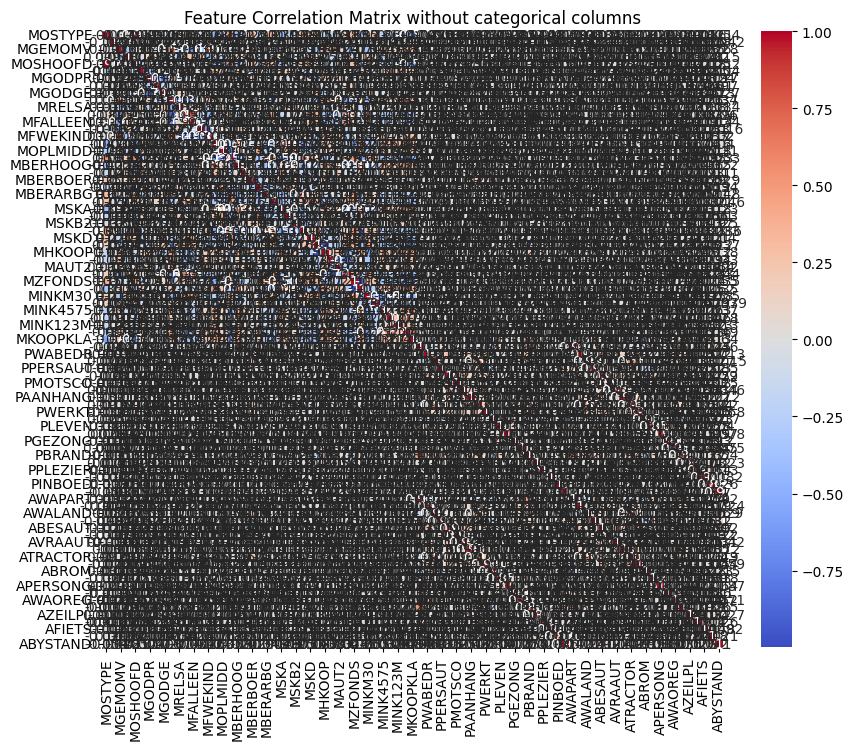

Highly correlated pairs:
 MOSHOOFD  MOSTYPE     0.992672
AWALAND   PWALAND     0.987579
AWAPART   PWAPART     0.981367
AGEZONG   PGEZONG     0.979968
ABROM     PBROM       0.969707
ABYSTAND  PBYSTAND    0.966239
AAANHANG  PAANHANG    0.966080
AVRAAUT   PVRAAUT     0.948663
AWAOREG   PWAOREG     0.948430
AFIETS    PFIETS      0.935854
ATRACTOR  PTRACTOR    0.929818
APERSAUT  PPERSAUT    0.916151
AWERKT    PWERKT      0.909671
AMOTSCO   PMOTSCO     0.904855
APLEZIER  PPLEZIER    0.904436
ABESAUT   PBESAUT     0.902995
APERSONG  PPERSONG    0.897562
AWABEDR   PWABEDR     0.895407
AINBOED   PINBOED     0.875256
AZEILPL   PZEILPL     0.870334
ABRAND    PBRAND      0.865569
ALEVEN    PLEVEN      0.850170
MFWEKIND  MGEMOMV     0.794015
MFALLEEN  MRELOV      0.745645
MSKA      MOPLHOOG    0.693686
          MBERHOOG    0.692598
MAUT0     MRELOV      0.661462
MSKC      MOPLLAAG    0.631192
MINKGEM   MINK7512    0.616550
MZPART    MBERHOOG    0.613739
MSKC      MBERARBG    0.612252
MZPART    MSK

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#8. Check for missing values across the dataset
# missing_values_train = insurance_train_val.isnull().sum()
# print("Columns with Missing Values for train and validation:")
# print(missing_values_train[missing_values_train > 0])

# missing_values_eval = insurance_evaluation.isnull().sum()
# print("Columns with Missing Values for evaluation:")
# print(missing_values_eval[missing_values_eval > 0])

#If the previous print gave a non-empty list, proceed with this code:

# # Replace missing values in numerical columns with the mean
# numerical_cols = insurance_train.select_dtypes(include=['int64', 'float64']).columns
# insurance_train[numerical_cols] = insurance_train[numerical_cols].fillna(insurance_train[numerical_cols].mean())

# # Replace missing values in categorical columns with the mode
# categorical_cols = insurance_train.select_dtypes(include=['object']).columns
# for col in categorical_cols:
#     insurance_train[col] = insurance_train[col].fillna(insurance_train[col].mode()[0])

# # Verify missing values have been handled
# print("Missing Values After Imputation:")
# print(insurance_train.isnull().sum().sum())  # Should output 0 if all missing values are handled

#9. Identify categorical columns
# categorical_cols = insurance_train_val.select_dtypes(include=['object']).columns
# print("Categorical columns for train and validation:")
# print(categorical_cols)

# categorical_cols_ev = insurance_evaluation.select_dtypes(include=['object']).columns
# print("Categorical Columns for evaluation:")
# print(categorical_cols_ev)

# #10. Apply label encoding to categorical columns
# label_encoders = {}  # To store encoders for future use
# for col in categorical_cols:
#     le = LabelEncoder()
#     insurance_train_val[col] = le.fit_transform(insurance_train_val[col])
#     label_encoders[col] = le  # Save encoder for potential reverse mapping

# for col in categorical_cols_ev:
#     le = LabelEncoder()
#     insurance_evaluation[col] = le.fit_transform(insurance_evaluation[col])
#     label_encoders[col] = le  # Save encoder for potential reverse mapping

# # Verify encoding
# print("\nEncoded Categorical Columns:")
# print(insurance_train_val[categorical_cols].head())

# #11. Identify numerical columns
ins_train_val_after = insurance_train_val.drop(columns=['CARAVAN'])
numerical_cols = ins_train_val_after.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Columns:")
print(numerical_cols)

numerical_cols_ev = insurance_evaluation.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Columns Ev:")
print(numerical_cols_ev)

#12. Standardize numerical features
scaler = StandardScaler()
ins_train_val_after[numerical_cols] = scaler.fit_transform(ins_train_val_after[numerical_cols])
insurance_evaluation[numerical_cols_ev] = scaler.fit_transform(insurance_evaluation[numerical_cols_ev])

# Verify scaling
print("\nScaled Numerical Features:")
print(ins_train_val_after[numerical_cols].head())

print("\nScaled Numerical Features Ev:")
print(insurance_evaluation[numerical_cols_ev].head())

#13. Final verification
print("\nTotal Missing Values:", ins_train_val_after.isnull().sum().sum())  # Should be 0
print("\nTotal Missing Values Ev:", insurance_evaluation.isnull().sum().sum())  # Should be 0
print("Remaining Object Columns:", ins_train_val_after.select_dtypes(include=['object']).columns)
print("Remaining Object Columns Ev:", insurance_evaluation.select_dtypes(include=['object']).columns)
print(ins_train_val_after[numerical_cols].describe())
print(insurance_evaluation[numerical_cols_ev].describe())

# Correlation matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#1. exclude categorical columns
# Select only numerical columns
#numerical_data = application_record.select_dtypes(include=['number'])

# Compute correlation matrix
#correlation_matrix = numerical_data.corr()
correlation_matrix = ins_train_val_after.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix without categorical columns")
plt.show()

#Tell the most influencial features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1.0]  # Exclude self-correlation
print("Highly correlated pairs:\n", high_corr_pairs[high_corr_pairs > 0.5])

from sklearn.decomposition import PCA

# Fit PCA without specifying components
pca = PCA()
pca.fit(ins_train_val_after)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", cumulative_variance)

# Find the number of components to retain 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95}")

# Apply PCA with 46 components
pca = PCA(n_components=46)
insurance_train_PCA = pca.fit_transform(ins_train_val_after)

# Verify the shape of the transformed dataset
print("Shape of PCA-transformed data:", insurance_train_PCA.shape)
print(type(insurance_train_PCA))


#Training a model: Logistic Regression

1. Preprocessing existing data

In [ ]:
import numpy as np

def add_intercept(X):
    #Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #Output: X: a numpy array of shape (N, D+1), where a column of ones is concatenated to the input array X

    ########## Your code goes here ##########

    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)

    #########################################

    return X

# def normalize(X, mean=None, std=None):
#     # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
#     #        mean: a numpy array of shape (D,) containing the mean of each feature
#     #        std: a numpy array of shape (D,) containing the standard deviation of each feature
#     # Output: X: a numpy array of shape (N, D), where each feature is normalized by subtracting the mean and dividing by the standard deviation

#     ########## Your code goes here ##########
#     if mean is None:
#       mean = np.mean(X, axis=0)
#     if std is None:
#       std = np.std(X, axis=0)
#     X = (X - mean) / std

#     #########################################

#     return X

def split_data(X, y, ratio=0.8):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        ratio: a float number between 0 and 1, representing the ratio of training data
    # Output: X_train: a numpy array of shape (N_train, D), containing the training data
    #         y_train: a numpy array of shape (N_train,), containing the target for each training sample
    #         X_test: a numpy array of shape (N_test, D), containing the testing data
    #         y_test: a numpy array of shape (N_test,), containing the target for each testing sample

    X_train, y_train, X_val, y_val = None, None, None, None
    num_samples = None

    ########## Your code goes here ##########

    num_samples = X.shape[0]
    num_train = int(num_samples * ratio)

    #Data shuffle
    indices = np.random.permutation(num_samples)
    train_indices = indices[:num_train]
    test_indices = indices[num_train:]

    X_train = X[train_indices]
    y_train = y[train_indices]
    X_val = X[test_indices]
    y_val = y[test_indices]

    #########################################

    return X_train, y_train, X_val, y_val


def preprocess_data(X, y, ratio=0.8):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        ratio: a float number between 0 and 1, representing the ratio of training data
    # Output: X_train: a numpy array of shape (N_train, D+1), containing the training data
    #         y_train: a numpy array of shape (N_train,), containing the target for each training sample
    #         X_test: a numpy array of shape (N_test, D+1), containing the testing data
    #         y_test: a numpy array of shape (N_test,), containing the target for each testing sample

    X_train, y_train, X_val, y_val = None, None, None, None

    ########## Your code goes here ##########

    # Split the data
    X_train, y_train, X_val, y_val = split_data(X, y, ratio)

    # # Compute the mean and std of the training data
    # mean = np.mean(X_train, axis=0)
    # std = np.std(X_train, axis=0)

    # # Normalize the training data
    # X_train = normalize(X_train, mean, std)

    # # Normalize the testing data
    # X_test = normalize(X_test, mean, std)

    # Add intercept to both training and testing data
    #X_train = add_intercept(X_train)
    #X_val = add_intercept(X_val)

    ########## Your code goes here ##########


    return X_train, y_train, X_val, y_val

In [ ]:
# Run preprocessing on the data
X = insurance_train_val.drop(columns=['CARAVAN']).values
#X = insurance_train_val.values
y = insurance_train_val['CARAVAN'].values

X_train, y_train, X_val, y_val = preprocess_data(X, y)

print('The shape of the training set is:')
print(X_train.shape, y_train.shape)
print('The shape of the test set is:')
print(X_val.shape, y_val.shape)

# Ensure y_train and y_val are integers
y_train = y_train.astype(int)
y_val = y_val.astype(int)

#Now check the distribution
print('Target distribution in training set:', np.bincount(y_train))
print('Target distribution in validation set:', np.bincount(y_val))
print('Target distribution in test set:', np.bincount(y_eval))

The shape of the training set is:
(4656, 85) (4656,)
The shape of the test set is:
(1165, 85) (1165,)
Target distribution in training set: [4373  283]
Target distribution in validation set: [1100   65]
Target distribution in test set: [3762  238]


2. Logistic Regression implementation

In [ ]:
def sigmoid(x):

    # Input: x: a numpy array
    # out: rez: a numpy array containing the sigmoid of the input array

    out = None

    ########## Your code goes here ##########

    out = 1 / (1 + np.exp(-x))
    #########################################

    return out


def predict(X, w):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    # Output: pred: a numpy array of shape (N,), containing the predicted values for the input data

    pred = None

    ########## Your code goes here ##########

    pred = sigmoid(X @ w)
    #########################################

    return pred

def compute_loss(X, y, w):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    # Output: loss: a float number representing the average loss

    loss = None

    ########## Your code goes here ##########
    prediction = predict(X,w)

    prediction = np.clip(prediction, 1e-10, 1 - 1e-10)
    loss = -np.mean(y * np.log(prediction) + (1 - y) * np.log(1 - prediction))

    #########################################

    #Using L2 loss
    # regularization = 0.01
    # pred = predict(X, w)
    # pred = np.clip(pred, 1e-10, 1 - 1e-10)  # Avoid log(0) errors
    # loss = -np.mean(y * np.log(pred) + (1 - y) * np.log(1 - pred))
    # loss += regularization * np.sum(w**2)  # L2 regularization term
    return loss


    return loss

def compute_gradient(X, y, w):

    grad = None

    ########## Your code goes here ##########

    grad = X.T @ (predict(X, w) - y)
    #########################################

    return grad

def compute_accuracy(X, y, w, threshold=0.5):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    #        threshold: a float number representing the threshold for the classification
    # Output: acc: a float number representing the accuracy of the model

    acc = None

    ########## Your code goes here ##########

    pred = predict(X,w)
    pred[pred >= threshold] = 1
    pred[pred < threshold] = 0
    acc = np.mean(pred == y)

    #########################################

    return acc



3. Training and evaluation

In [ ]:
def train(X, y, w, alpha, no_iterations):

    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    #        alpha: a float number representing the learning rate
    #        no_iterations: an integer representing the number of iterations
    # Output: w: a numpy array of shape (D,), the weights of the trained linear model
    #         losses: a list of floats containing the loss at each update
    #         accuraces: a list of floats containing the accuracy at each update

    losses = []
    accuraces = []

    for step in range(no_iterations):

        ########## Your code goes here ##########
        grad = compute_gradient(X, y, w)
        w = w - alpha * grad
        loss = compute_loss(X, y, w)
        accuracy = compute_accuracy(X, y, w)

        losses.append(loss)
        accuraces.append(accuracy)
        #########################################

    return w, losses, accuraces

def test(X, y, w):

    #Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #       y: a numpy array of shape (N,), containing the target for each sample
    #       w: a numpy array of shape (D,), containing the weights of the linear model
    #Output: loss: a float number representing the loss of the model
    #        accuracy: a float number representing the accuracy of the model

    loss, accuracy = None, None

    ########## Your code goes here ##########

    loss = compute_loss(X, y, w)
    accuracy = compute_accuracy(X, y, w)

    #########################################

    return loss, accuracy

In [ ]:
#Let's test our data against the Logistic Regression algorithm

#1. Add intercept to our evaluation and target set
X_eval = insurance_evaluation.values
y_eval = insurance_targets.values

#2. Initialize weights
w = np.zeros(X_train.shape[1])

#Train step
w_train, losses, accuracies = train(X_train, y_train, w, alpha=0.01, no_iterations=1000)

#Validation step
val_loss, val_accuracy = test(X_val, y_val, w_train)
print(f"Logistic Regression - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

print(X_eval.shape)
print(y_eval.shape)

#Evaluation step
# eval_loss, eval_accuracy = test(X_eval, y_eval, w_train)
# print(f"Logistic Regression - Evaluation Loss: {eval_loss:.4f}, Evaluation Accuracy: {eval_accuracy:.4f}")

# #3. Save weights as a NumPy file
# np.save('logistic_regression_weights.npy', w_train)

# # Save normalization parameters
# np.savez('logistic_regression_metadata.npz', threshold=0.5)


<ipython-input-60-ab002da41191>:10: RuntimeWarning: overflow encountered in exp
  out = 1 / (1 + np.exp(-x))


Logistic Regression - Validation Loss: 1.6405, Validation Accuracy: 0.9288
(4000, 85)
(4000,)
Logistic Regression - Evaluation Loss: 10.6512, Evaluation Accuracy: 0.5282


# Training a model: SVM

1. Kernel function

In [ ]:
#Necessary libraries
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC


def compute_kernel_matrix(x, y, kwargs):

    kernel_type = kwargs['kernel_type']

    result = None

    ######## YOUR CODE HERE ########

    #print(x.shape)
    #print(y.shape)

    if kernel_type == 'linear':
        #print(x.shape)
        #print(y.shape)
        result = x @ y.T # dot product between x and x's transpose - to create the kernel matrix

    if kernel_type == 'polynomial':
        c = kwargs['c']
        degree = kwargs['degree']
        result = (x @ y.T + c) ** degree

    if kernel_type == 'gaussian':
        gamma = kwargs['gamma']
        sq_dists = np.sum(x**2, axis=1).reshape(-1, 1) + np.sum(y**2, axis=1) - 2 * np.dot(x, y.T)
        result = np.exp(-gamma * sq_dists)
    ################################

    return result

2. Alpha finding

In [ ]:
def find_alpha_soft(X, y, K, C):

    n_samples, n_features = X.shape
    P_numpy, q_numpy, G_numpy, h_numpy, A_numpy, b_numpy = None, None, None, None, None, None

    # Convert inputs to cvxopt format
    ######### YOUR CODE HERE #########

    y = y.reshape(-1,1) #shape it as a vector of (n_samples,1)

    yyt = y @ y.T #compute yi*yj

    P_numpy = yyt * K #matrix multiplication between each line and each column for y, them multiplied by matrix K
    q_numpy = -np.ones(n_samples)
    G_numpy = np.vstack((-np.eye(n_samples), np.eye(n_samples)))
    h_numpy = np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)) #not convinced about this
    A_numpy = y.reshape(1,-1)
    b_numpy = np.zeros(1)

    ##################################

    # Convert inputs to cvxopt format
    P = matrix(P_numpy, tc='d')
    q = matrix(q_numpy, tc='d')
    G = matrix(G_numpy, tc='d')
    h = matrix(h_numpy, tc='d')
    A = matrix(A_numpy, tc='d')
    b = matrix(b_numpy, tc='d')

    # Solve the QP problem to find Lagrange multipliers alpha
    solution = solvers.qp(P, q, G, h, A, b)
    alpha = np.ravel(solution['x'])

    return alpha

3. Predict function and evaluation

In [ ]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

class SoftMarginSVM:
    def __init__(self, kwargs=None):
        self.kwargs = kwargs
        self.C = kwargs['C']
        self.alpha = None
        self.support_vectors = None
        self.w = None
        self.b = None

    def kernel_function(self, x, y):
        return compute_kernel_matrix(x, y, self.kwargs)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Compute the Kernel matrix
        K = self.kernel_function(X, X)

        self.alpha = find_alpha_soft(X, y, K, self.C)

        # Select support vectors
        support_vector_indices = (self.alpha > 1e-8) & (self.alpha < self.kwargs.get('C', np.inf))
        self.alpha = self.alpha[support_vector_indices]
        self.support_vectors = X[support_vector_indices]
        self.support_vector_labels = y[support_vector_indices]

        # Compute the bias term b
        ######### YOUR CODE HERE #########

        decision_function_at_support = np.sum(
            self.alpha * self.support_vector_labels *
            self.kernel_function(self.support_vectors, self.support_vectors), axis=1
        )
        self.b = np.mean(self.support_vector_labels - decision_function_at_support)

        ##################################

    def predict(self, X):

        pred = None

        ######### YOUR CODE HERE #########

        K_matr = self.kernel_function(X, self.support_vectors)

        decision_function = K_matr @ (self.alpha * self.support_vector_labels) + self.b

        pred = np.sign(decision_function)

        ##################################

        return pred

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o', s=30, edgecolors='k', label='Data Points')
        plt.scatter(self.support_vectors[:, 0], self.support_vectors[:, 1], s=100, linewidth=1, facecolors='none',
                    edgecolors='k', label='Support Vectors')

        # Plot decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(grid).reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.legend()
        plt.show()


     pcost       dcost       gap    pres   dres
 0: -9.2530e+02 -1.0688e+04  6e+04  3e+00  5e-11
 1: -5.5916e+02 -6.0684e+03  8e+03  2e-01  5e-11
 2: -5.1808e+02 -2.1180e+03  2e+03  4e-02  3e-11
 3: -5.2039e+02 -1.1813e+03  7e+02  1e-02  3e-11
 4: -5.2300e+02 -9.2553e+02  4e+02  5e-03  3e-11
 5: -5.2707e+02 -6.2404e+02  1e+02  3e-04  3e-11
 6: -5.2792e+02 -5.9820e+02  7e+01  5e-05  3e-11
 7: -5.2964e+02 -5.4133e+02  1e+01  7e-06  3e-11
 8: -5.2995e+02 -5.3156e+02  2e+00  7e-07  3e-11
 9: -5.3000e+02 -5.3009e+02  9e-02  6e-09  4e-11
10: -5.3000e+02 -5.3000e+02  3e-03  1e-10  4e-11
11: -5.3000e+02 -5.3000e+02  1e-04  2e-12  4e-11
Optimal solution found.
Validation Accuracy: 92.88%


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 85 is different from 2)

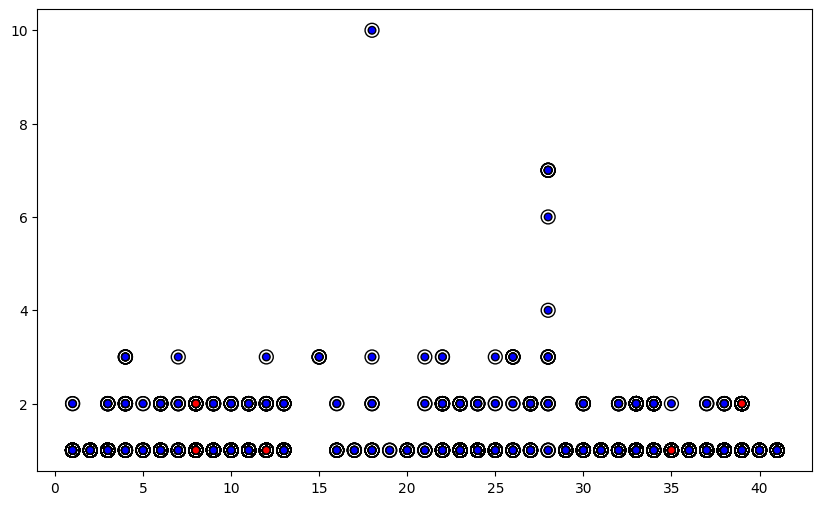

In [ ]:
#Lets test the algorithm against our dataset

#1. Transform targets to -1 and +1
y_train_transformed = np.where(y_train == 0, -1, 1)
y_val_transformed = np.where(y_val == 0, -1, 1)

#2. Set SVM parameters
svm_kwargs = {
    'C': 1.0,        # Regularization parameter
    'kernel_type': 'linear'  # Change to 'rbf' if using RBF kernel
}

#3. Instantiate and train the model
svm = SoftMarginSVM(kwargs=svm_kwargs)
svm.fit(X_train, y_train_transformed)

#4. Model evaluation

y_val_pred = svm.predict(X_val) #Predict on validation set
y_val_pred_original = np.where(y_val_pred == -1, 0, 1) # Convert predictions back to 0 and 1

#Accuracy evaluation
accuracy = np.mean(y_val_pred_original == y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

#5. Visualize decision boundary
svm.plot_decision_boundary(X_train, y_train_transformed)


Evaluation Accuracy: 94.05%
Evaluation Set Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.00      0.00      0.00       238

    accuracy                           0.94      4000
   macro avg       0.47      0.50      0.48      4000
weighted avg       0.88      0.94      0.91      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


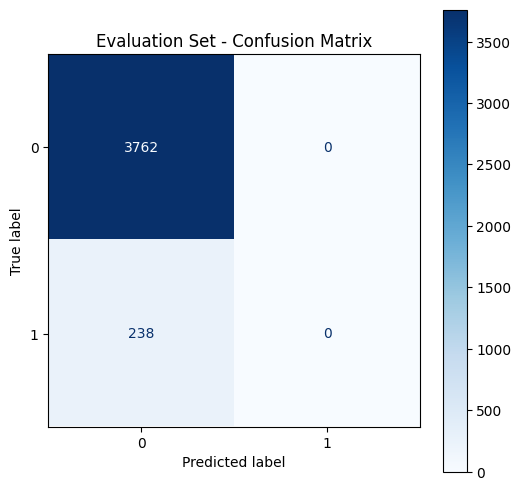

In [ ]:
#Evaluation part
# Transform evaluation targets to -1 and +1
y_eval_transformed = np.where(y_eval == 0, -1, 1)

# Predict on the evaluation set
y_eval_pred = svm.predict(X_eval)

# Convert predictions back to original labels (0 and 1)
y_eval_pred_original = np.where(y_eval_pred == -1, 0, 1)

# Calculate evaluation accuracy
eval_accuracy = np.mean(y_eval_pred_original == y_eval)
print(f"Evaluation Accuracy: {eval_accuracy * 100:.2f}%")

# Classification report for evaluation set
from sklearn.metrics import classification_report
print("Evaluation Set Classification Report:")
print(classification_report(y_eval, y_eval_pred_original))

# Confusion matrix visualization for evaluation set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_eval, y_eval_pred_original)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1"])

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap="Blues", ax=ax)
plt.title("Evaluation Set - Confusion Matrix")
plt.show()


# Training a model: Random Forest

1. DecisionTree class

In [ ]:
#Necessary libraries
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from collections import Counter
import math

class DecisionTree:
    def __init__(self, max_depth=None, criterion="gini", percent_of_features=None):
        self.max_depth = max_depth
        self.criterion = criterion
        self.tree = None
        self.percent_of_features = percent_of_features

    def fit(self, X, y):
        self.tree = self.grow_tree(X, y)

    def grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(set(y))

        # regularization - stop if max_depth is reached or if there is only one label
        if (depth >= self.max_depth or num_labels == 1):
            return {"label": Counter(y).most_common(1)[0][0]}

        number_of_features = int(num_features * self.percent_of_features)
        features_index_to_consider = np.random.choice(num_features, number_of_features, replace=False)
        best_split = self.best_split(X, y, features_index_to_consider)

        if best_split["gain"] == 0:
            return {"label": Counter(y).most_common(1)[0][0]}

        left = self.grow_tree(best_split["X_left"], best_split["y_left"], depth + 1)
        right = self.grow_tree(best_split["X_right"], best_split["y_right"], depth + 1)

        return {
            "feature": best_split["feature"],
            "threshold": best_split["threshold"],
            "left": left,
            "right": right,
        }

    # Find the best split for the current node in the tree with respect to one feature
    # input: X, y, num_features
    # output: split -> dictionary containing the feature, threshold, gain, X_left, y_left, X_right, y_right
    def best_split(self, X, y, features_index_to_consider):

        best_gain = -1
        feature, threshold, gain, X_left, X_right, y_left, y_right = None, None, None , None, None, None, None

        ########## Your code goes here ##########

        for feat in features_index_to_consider:
          thresholds = np.unique(X[:, feat])
          for threshold_t in thresholds:
            #Perform split
            gain, X_left_g, y_left_g, X_right_g, y_right_g = self.split(X, y, feat, threshold_t)

            #update the best split if the found one is better
            if gain > best_gain:
              best_gain = gain
              feature = feat
              threshold = threshold_t
              X_left = X_left_g
              X_right = X_right_g
              y_left = y_left_g
              y_right = y_right_g

        ###########################################

        #Store the best split into a dictionary
        split = {
            "feature": feature,
            "threshold": threshold,
            "gain": best_gain,
            "X_left": X_left,
            "y_left": y_left,
            "X_right": X_right,
            "y_right": y_right,
        }

        return split

    # split the data into two regions based on the feature and threshold and computes the information gain
    def split(self, X, y, feature, threshold):
        left_idx = X[:, feature] <= threshold
        right_idx = X[:, feature] > threshold
        X_left, y_left = X[left_idx], y[left_idx]
        X_right, y_right = X[right_idx], y[right_idx]

        if len(y_left) == 0 or len(y_right) == 0:
            return 0, X_left, y_left, X_right, y_right

        gain = self.information_gain(y, y_left, y_right)

        return gain, X_left, y_left, X_right, y_right

    # Compute the information gain
    # Note that you must weight the left and right child nodes by the number of samples in each
    def information_gain(self, y, y_left, y_right):

        gain = None

        ########## Your code goes here ##########

        if self.criterion == "gini":
          gain = self.gini(y) - (len(y_left) / len(y)) * self.gini(y_left) - (len(y_right) / len(y)) * self.gini(y_right)
        elif self.criterion == "entropy":
          gain = self.entropy(y) - (len(y_left) / len(y)) * self.entropy(y_left) - (len(y_right) / len(y)) * self.entropy(y_right)

        ###########################################

        return gain

    # Compute the gini impurity
    def gini(self, y):

        gini_impurity = None

        ########## Your code goes here ##########

        gini_impurity = 1 - sum((counts / len(y)) ** 2 for counts in np.unique(y, return_counts=True)[1])

        ###########################################

        return gini_impurity

    # Compute the entropy
    def entropy(self, y):

        entropy_value = None

        ########## Your code goes here ##########

        entropy_value = -sum((counts / len(y)) * np.log2(counts / len(y) + 1e-9) for counts in np.unique(y, return_counts=True)[1])
        ###########################################

        return entropy_value

    # Predict for a vector of inputs
    def predict(self, X):
        return np.array([self.predict_single(inputs, self.tree) for inputs in X])

    # Predict for a single input
    def predict_single(self, inputs, tree):
        if "label" in tree:
            return tree["label"]
        feature = tree["feature"]
        threshold = tree["threshold"]
        if inputs[feature] <= threshold:
            return self.predict_single(inputs, tree["left"])
        else:
            return self.predict_single(inputs, tree["right"])



2. RandomForest class

In [ ]:
class RandomForest():
    def __init__(self, n_trees=80, max_depth=5, criterion="gini", percent_of_features=None, percent_of_samples=None):
        # Initialize the random forest
        # input: n_trees -> number of trees in the forest
        #        max_depth -> maximum depth of the tree
        #        criterion -> criterion to use for splitting
        #        percent_of_features -> percentage of features to consider for each split
        #        percent_of_samples -> percentage of samples to consider for each tree

        self.n_trees = n_trees
        self.trees = [DecisionTree(max_depth=max_depth, criterion=criterion, percent_of_features=percent_of_features) for i in range(n_trees)]
        self.percent_of_samples = percent_of_samples

    def split_data(self, X, y, n_trees):

        # Split the data into n_trees number of samples
        # input: X -> data
        #        y -> labels
        #        n_trees -> number of trees
        # output: X_split -> list of data split into n_trees number of samples
        #         y_split -> list of labels split into n_trees number of samples
        # Note: Make sure the split is random and that after picking one sample, it can be picked again. Hint: np.random.choice

        X_split = []
        y_split = []
        for _ in range(n_trees):

            ########## Your code goes here ##########

            random_indices = np.random.choice(len(X), int(len(X) * self.percent_of_samples), replace=True)
            X_split.append(X[random_indices])
            y_split.append(y[random_indices])

            ###########################################

        return X_split, y_split

    def fit(self, X, y):
        # Fit the random forest
        # input: X -> data
        #        y -> labels
        # Note: Split the data and fit each tree in the forest

        ########## Your code goes here ##########

        X_split, y_split = self.split_data(X, y, self.n_trees)
        for i in range(self.n_trees):
          self.trees[i].fit(X_split[i], y_split[i])
        ###########################################

    def predict(self, X):
        # Predict the label for each sample in X
        # input: X -> data
        # output: pred -> list of labels

        pred = None

        ########## Your code goes here ##########

        pred = np.array([tree.predict(X) for tree in self.trees])
        pred = np.array([Counter(tree).most_common(1)[0][0] for tree in pred.T])

        ###########################################

        return pred



3. Calls

Validation Accuracy: 92.70%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1082
           1       0.00      0.00      0.00        83

    accuracy                           0.93      1165
   macro avg       0.46      0.50      0.48      1165
weighted avg       0.86      0.93      0.89      1165



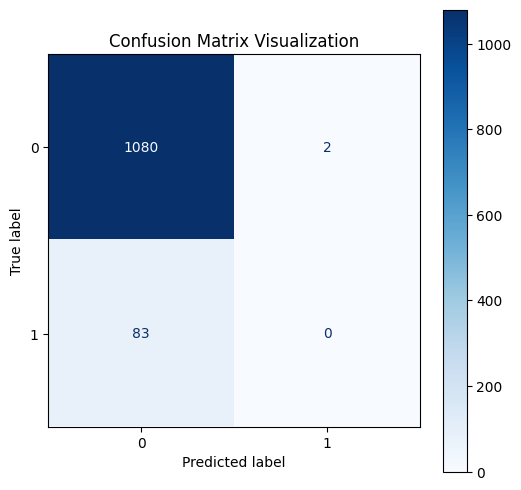

Feature 0: Importance 0.07
Feature 1: Importance 0.00
Feature 2: Importance 0.00
Feature 3: Importance 0.00
Feature 4: Importance 0.10
Feature 5: Importance 0.00
Feature 6: Importance 0.00
Feature 7: Importance 0.00
Feature 8: Importance 0.00
Feature 9: Importance 0.00
Feature 10: Importance 0.00
Feature 11: Importance 0.00
Feature 12: Importance 0.00
Feature 13: Importance 0.00
Feature 14: Importance 0.00
Feature 15: Importance 0.00
Feature 16: Importance 0.00
Feature 17: Importance 0.00
Feature 18: Importance 0.00
Feature 19: Importance 0.00
Feature 20: Importance 0.00
Feature 21: Importance 0.00
Feature 22: Importance 0.00
Feature 23: Importance 0.00
Feature 24: Importance 0.00
Feature 25: Importance 0.00
Feature 26: Importance 0.00
Feature 27: Importance 0.00
Feature 28: Importance 0.00
Feature 29: Importance 0.00
Feature 30: Importance 0.00
Feature 31: Importance 0.00
Feature 32: Importance 0.00
Feature 33: Importance 0.00
Feature 34: Importance 0.00
Feature 35: Importance 0.00
Fe

In [ ]:
# forest = RandomForest(n_trees = 30, max_depth=5, criterion="gini", percent_of_features=0.5, percent_of_samples=0.5)
# forest.fit(X, y)

# tree = DecisionTree(max_depth=3, criterion="gini", percent_of_features=1.)
# tree.fit(X, y)

#Lets test it against our data

#1. initialize the Random Forest
forest = RandomForest(
    n_trees=30,            # Number of trees
    max_depth=5,           # Maximum depth of each tree
    criterion="gini",      # Splitting criterion
    percent_of_features=0.5,  # Percentage of features to consider per split
    percent_of_samples=0.5    # Percentage of samples to use per tree
)

# Train the Random Forest
forest.fit(X_train, y_train)

# Predict on validation data
y_val_pred = forest.predict(X_val)

# Compute accuracy
accuracy = np.mean(y_val_pred == y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:\n", classification_report(y_val, y_val_pred))

cm = confusion_matrix(y_val, y_val_pred)
labels = ["0", "1"]
# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix Visualization")
plt.show()
#print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# Feature importance
feature_importance = np.zeros(X_train.shape[1])

# Sum feature usage across all trees
for tree in forest.trees:
    if tree.tree:
        feature_importance[tree.tree["feature"]] += 1

# Normalize importance
feature_importance /= np.sum(feature_importance)

# Display importance
for i, importance in enumerate(feature_importance):
    print(f"Feature {i}: Importance {importance:.2f}")


Evaluation Accuracy: 93.97%
Evaluation Set Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.00      0.00      0.00       238

    accuracy                           0.94      4000
   macro avg       0.47      0.50      0.48      4000
weighted avg       0.88      0.94      0.91      4000



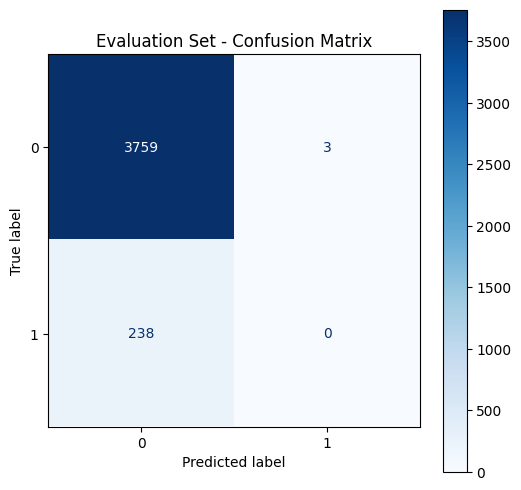

In [ ]:
#Evaluation dataset
# Predict on evaluation data
y_eval_pred = forest.predict(X_eval)

# Compute evaluation accuracy
eval_accuracy = np.mean(y_eval_pred == y_eval)
print(f"Evaluation Accuracy: {eval_accuracy * 100:.2f}%")

# Classification report for evaluation set
print("Evaluation Set Classification Report:\n", classification_report(y_eval, y_eval_pred))

# Confusion matrix for evaluation set
cm_eval = confusion_matrix(y_eval, y_eval_pred)
disp_eval = ConfusionMatrixDisplay(confusion_matrix=cm_eval, display_labels=["0", "1"])

# Plot confusion matrix for evaluation set
fig, ax = plt.subplots(figsize=(6, 6))
disp_eval.plot(cmap="Blues", ax=ax)
plt.title("Evaluation Set - Confusion Matrix")
plt.show()